<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Titanic-Survival-Prediction-Using-Python/blob/main/CodeAlpha(Titanic_Classification)_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

#machine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

#importing Dataset

In [ ]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df = pd.DataFrame(dataset)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.   Pclass = Ticket Class
2.   Embark = ABBREVIATIONS FOR STATIONS.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()
nan_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



1.   Age has missing value
2.   Cabin will be Dropped as it has about 83.8% missing values
3. Embarked has only 2 nan Records
4. PassengerId, Name, Ticket



In [ ]:
df = df.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"])

In [ ]:
df['Age'].fillna(df["Age"].median(), inplace=True)

In [ ]:
# dropping 2 Rows of nan values in Embarked Col
df = df.dropna()

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
df['Age'] = df['Age'].apply(np.ceil)
df['Fare'] = df['Fare'].apply(np.ceil)

In [ ]:
df["Age"]=df["Age"].astype(int)
df["Fare"]=df["Fare"].astype(int)

In [ ]:
df["Age"].eq(0).sum()

0

In [ ]:
df["Fare"].eq(0).sum()

15

this means that there are some People with fare = 0 and its not acceptable

In [ ]:
med = df["Fare"].median()
df['Fare'] = df['Fare'].replace(0, med)

In [ ]:
df["Fare"].eq(0).sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Sex       889 non-null    object
 3   Age       889 non-null    int64 
 4   SibSp     889 non-null    int64 
 5   Parch     889 non-null    int64 
 6   Fare      889 non-null    int64 
 7   Embarked  889 non-null    object
dtypes: int64(6), object(2)
memory usage: 62.5+ KB


In [ ]:
count = df["Survived"].value_counts()
count

Survived
0    549
1    340
Name: count, dtype: int64

<ipython-input-144-49a35148b8ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar =sns.barplot(x=(0,1),y=count,palette=['r','g'])


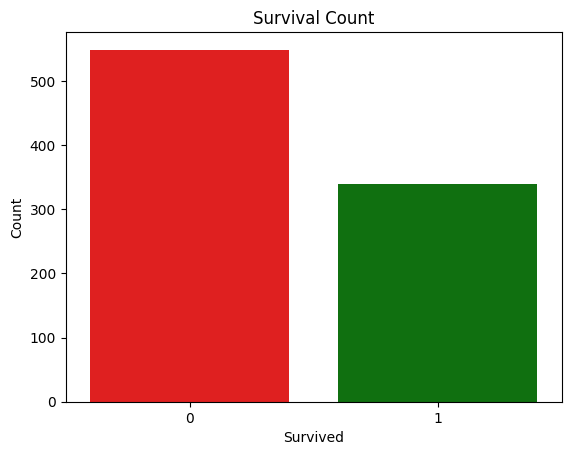

In [ ]:
bar =sns.barplot(x=(0,1),y=count,palette=['r','g'])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

<ipython-input-145-c3736fa5af5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2=sns.barplot(x=(1,2,3),y=Pclass,palette=['r','g','y'])


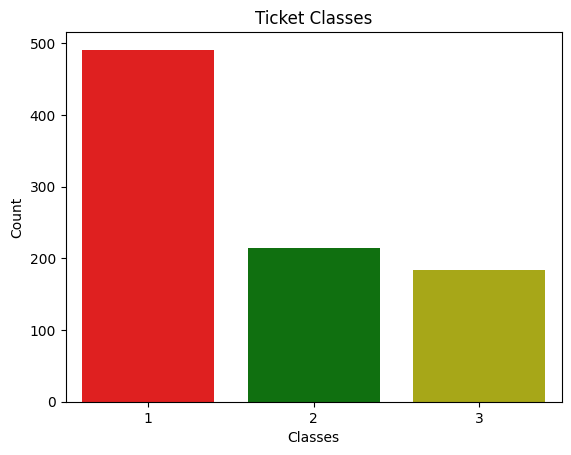

In [ ]:
Pclass = df["Pclass"].value_counts()

bar2=sns.barplot(x=(1,2,3),y=Pclass,palette=['r','g','y'])
plt.title("Ticket Classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

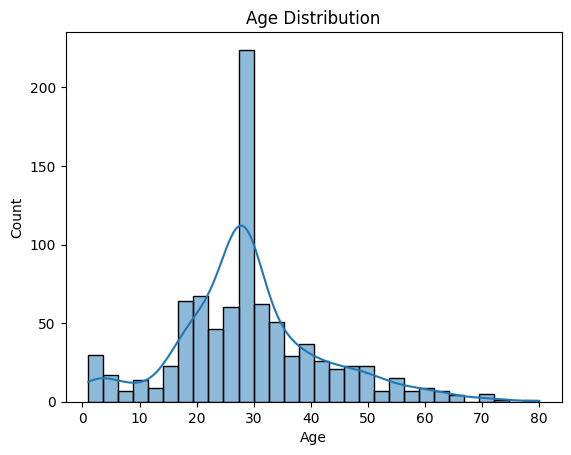

In [ ]:
sns.histplot(x=df["Age"],bins=30, kde = True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

#Splitting Dataset

In [ ]:
df = df.drop(columns=["SibSp","Parch"])

In [ ]:
x = df.iloc[: , 1:].values
y = df.iloc[: , 0].values

In [ ]:
print(x)

[[3 'male' 22 8 'S']
 [1 'female' 38 72 'C']
 [3 'female' 26 8 'S']
 ...
 [3 'female' 28 24 'S']
 [1 'male' 26 30 'C']
 [3 'male' 32 8 'Q']]


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22,8,S
1,1,1,female,38,72,C
2,1,3,female,26,8,S
3,1,1,female,35,54,S
4,0,3,male,35,9,S


In [ ]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,1]=le.fit_transform(x[:,1])
x[:,4]=le.fit_transform(x[:,4])

In [ ]:
print(x)

[[3 1 22 8 2]
 [1 0 38 72 0]
 [3 0 26 8 2]
 ...
 [3 0 28 24 2]
 [1 1 26 30 0]
 [3 1 32 8 1]]


In [ ]:
df_x = pd.DataFrame(x)

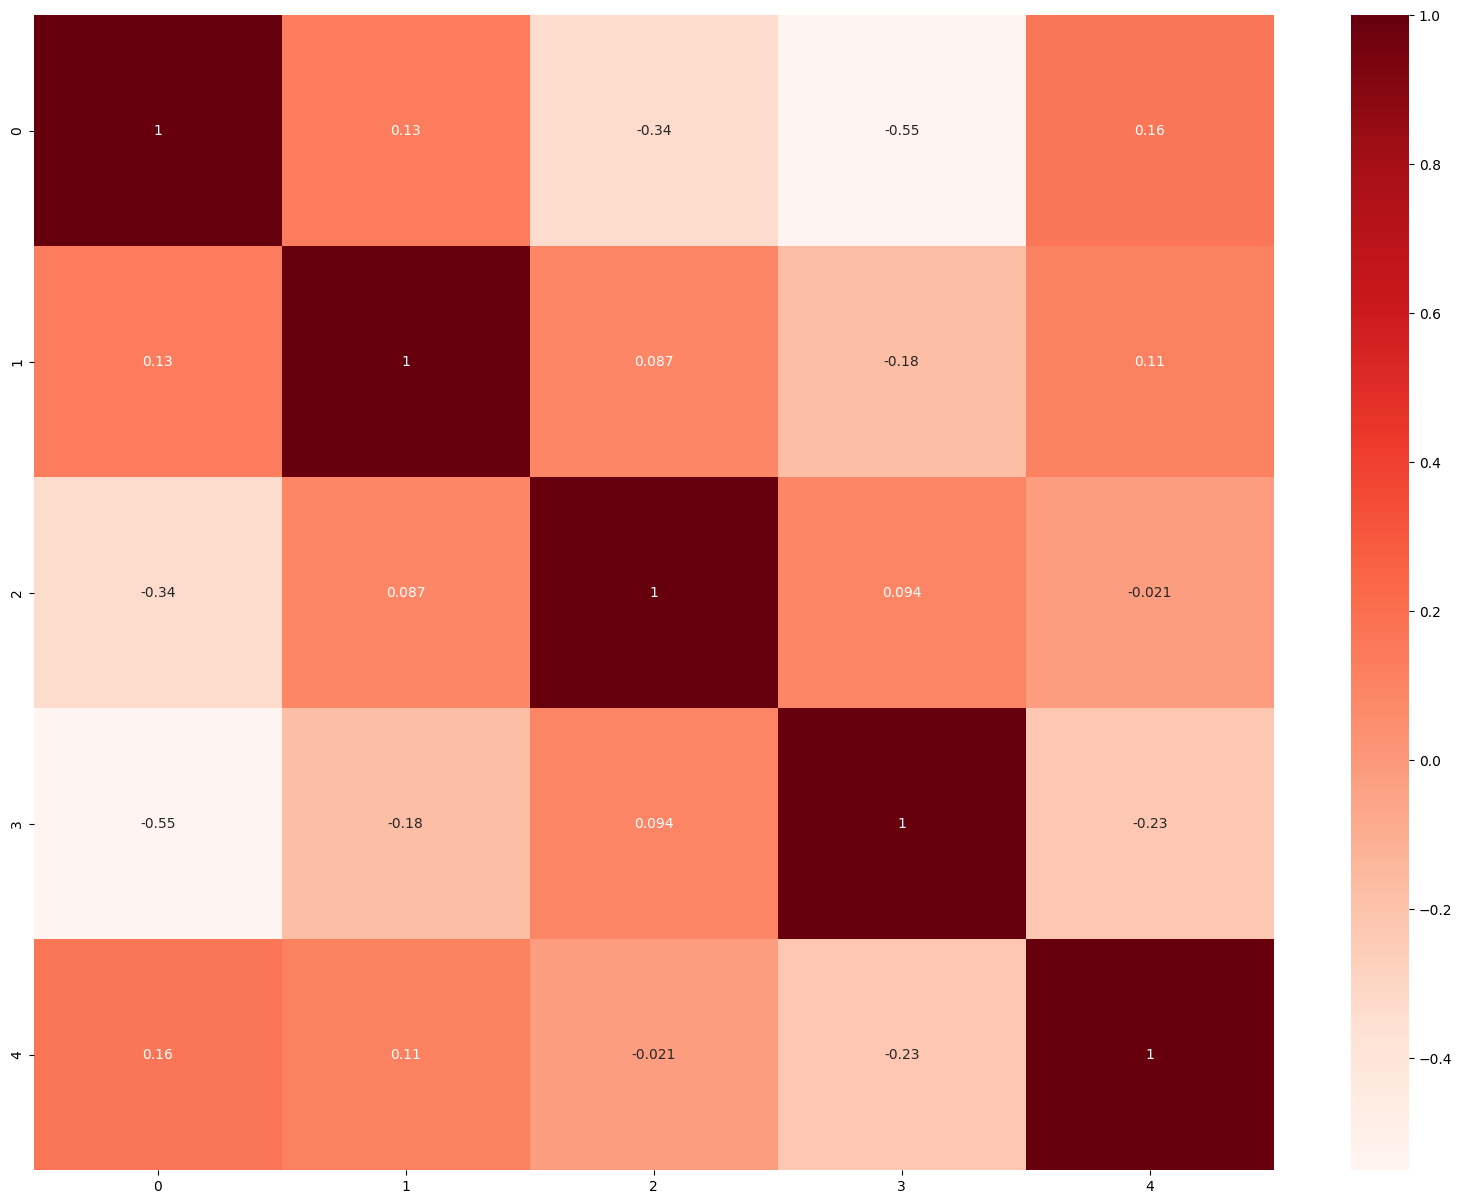

In [ ]:
df_n = pd.DataFrame(df_x.values)
correlation_matrix = df_n.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# creating instance
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 99)

print(x_train)
print("-----------------------")
print(y_train)
print("-----------------------")
print(x_test)
print("-----------------------")
print(y_test)

[[3 1 1 21 2]
 [1 0 39 111 0]
 [3 1 28 8 2]
 ...
 [3 0 28 16 1]
 [1 1 42 52 2]
 [3 0 2 28 2]]
-----------------------
[1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 

#Feature Scale

In [ ]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)
print("--------------------")
print(x_test)

[[ 0.8195577   0.72508694 -2.15958507 -0.23052952  0.57428259]
 [-1.58831638 -1.37914496  0.73953395  1.65948763 -1.96183495]
 [ 0.8195577   0.72508694 -0.09968471 -0.503532    0.57428259]
 ...
 [ 0.8195577  -1.37914496 -0.09968471 -0.33553047 -0.69377618]
 [-1.58831638  0.72508694  0.96841177  0.42047639  0.57428259]
 [ 0.8195577  -1.37914496 -2.08329247 -0.08352818  0.57428259]]
--------------------
[[-1.58831638e+00  7.25086942e-01  1.50246001e+00  5.25477342e-01
  -1.96183495e+00]
 [-1.58831638e+00  7.25086942e-01  5.10656134e-01 -1.04528375e-01
   5.74282595e-01]
 [-1.58831638e+00  7.25086942e-01  5.86948740e-01 -4.15278030e-02
  -1.96183495e+00]
 [-1.58831638e+00 -1.37914496e+00  1.29193105e-01  1.72248820e+00
  -1.96183495e+00]
 [ 8.19557703e-01  7.25086942e-01 -9.96847129e-02 -5.03531995e-01
  -6.93776178e-01]
 [ 8.19557703e-01  7.25086942e-01 -1.75977319e-01 -3.56530661e-01
  -1.96183495e+00]
 [ 8.19557703e-01  7.25086942e-01 -9.96847129e-02 -4.82531805e-01
   5.74282595e-01]


#Model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf',random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svm = classifier.predict(x_test)
cm_svm = confusion_matrix(y_test,y_pred_svm)
print(cm_svm)
print(accuracy_score(y_test,y_pred_svm))

[[96  6]
 [34 42]]
0.7752808988764045


In [ ]:
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier(n_estimators=10 , criterion="entropy", random_state=0)
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rf = RF.predict(x_test)

cm_rf = confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
print(accuracy_score(y_test,y_pred_rf))

[[86 16]
 [25 51]]
0.7696629213483146


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy" , random_state = 0)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt = DT.predict(x_test)
cm_dt = confusion_matrix(y_test , y_pred_dt)
print(cm_dt)
accuracy_score(y_test , y_pred_dt)

[[83 19]
 [25 51]]


0.7528089887640449

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":['gini','entropy'],

            "max_depth":[2,6,10,14,18],
            "min_samples_split":[3,7,11,15,19],
            "max_features":["sqrt","log2"],
            "n_estimators":[100,200,300,400]}
model2=RandomForestClassifier()
tuning=GridSearchCV(model2,param_grid=parameters,cv=5,scoring='accuracy')
tuning.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 10, 14, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 7, 11, 15, 19],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
y_pred_rt = tuning.predict(x_test)
cm_rt = confusion_matrix(y_test , y_pred_rt)
print(cm_rt)
accuracy_score(y_test , y_pred_rt)

[[86 16]
 [23 53]]


0.7808988764044944